In [1]:
from googleapiclient.discovery import build
import seaborn as sns
import pandas as pd

In [3]:
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv("API_KEY")



In [4]:
channel_id = 'UCnU7ly6zEcQxUScjhkgFYAQ'

youTube = build('youtube','v3',developerKey=api_key)

In [35]:
#multiple channels ids 
channel_ids = ['UCnU7ly6zEcQxUScjhkgFYAQ', #Thogden
               'UCaTxfj0BzL-MaCy-YUqPRoQ', #THE RACE
               'UCODHrzPMGbNv67e84WDZhQQ', #fern
               'UCrmsp2voP5agAXWHvEPvxsg', #Neeraj Walia
               'UCsObGXVUdSh-bHT7CdVXrrw' #MagicalMessi 
               ]


## Function to get channel statistics

In [48]:
def get_channel_stats(youtube,channel_ids):
    all_data = []
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids)
    )
    response = request.execute()

    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                Subscribers = response['items'][i]['statistics']['subscriberCount'],
                Views = response['items'][i]['statistics']['viewCount'],
                Total_videos = response['items'][i]['statistics']['videoCount'],
                Playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
        )
        all_data.append(data)

    return all_data



In [49]:
channel_statistics = get_channel_stats(youTube,channel_ids)

In [50]:
channel_statistics

[{'Channel_name': 'Neeraj Walia',
  'Subscribers': '353000',
  'Views': '73553552',
  'Total_videos': '1248',
  'Playlist_id': 'UUrmsp2voP5agAXWHvEPvxsg'},
 {'Channel_name': 'MagicalMessi',
  'Subscribers': '1530000',
  'Views': '367673645',
  'Total_videos': '130',
  'Playlist_id': 'UUsObGXVUdSh-bHT7CdVXrrw'},
 {'Channel_name': 'THE RACE',
  'Subscribers': '1090000',
  'Views': '524075901',
  'Total_videos': '2404',
  'Playlist_id': 'UUaTxfj0BzL-MaCy-YUqPRoQ'},
 {'Channel_name': 'fern',
  'Subscribers': '1290000',
  'Views': '60779870',
  'Total_videos': '34',
  'Playlist_id': 'UUODHrzPMGbNv67e84WDZhQQ'},
 {'Channel_name': 'Thogden',
  'Subscribers': '1790000',
  'Views': '637442691',
  'Total_videos': '2024',
  'Playlist_id': 'UUnU7ly6zEcQxUScjhkgFYAQ'}]

In [51]:
channel_data = pd.DataFrame(channel_statistics)
channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
0,Neeraj Walia,353000,73553552,1248,UUrmsp2voP5agAXWHvEPvxsg
1,MagicalMessi,1530000,367673645,130,UUsObGXVUdSh-bHT7CdVXrrw
2,THE RACE,1090000,524075901,2404,UUaTxfj0BzL-MaCy-YUqPRoQ
3,fern,1290000,60779870,34,UUODHrzPMGbNv67e84WDZhQQ
4,Thogden,1790000,637442691,2024,UUnU7ly6zEcQxUScjhkgFYAQ


In [40]:
channel_data.dtypes

Channel_name    object
Subscribers     object
Views           object
Total_videos    object
dtype: object

In [41]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
dtype: object

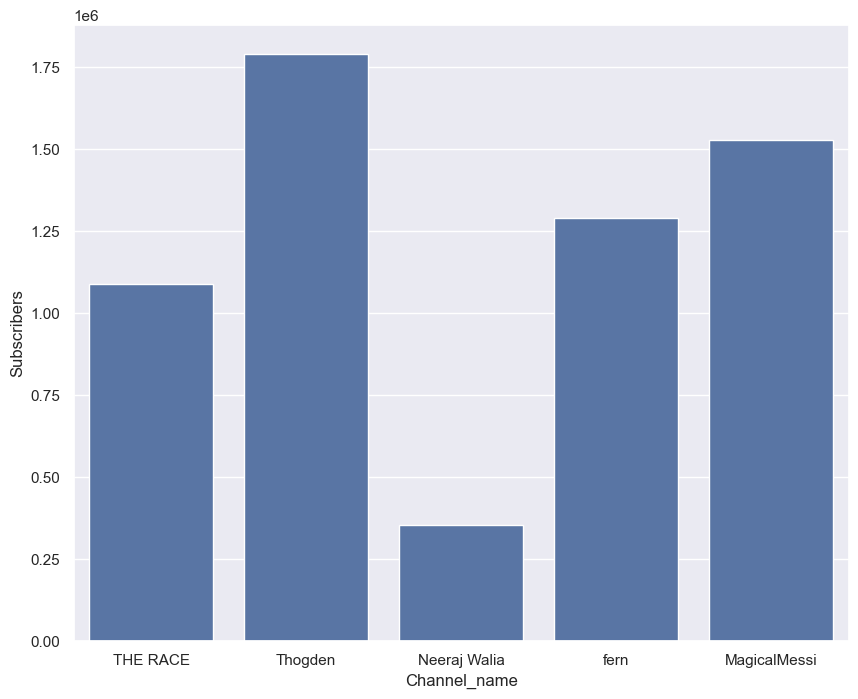

In [43]:
sns.set_theme(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='Channel_name',y='Subscribers',data=channel_data)

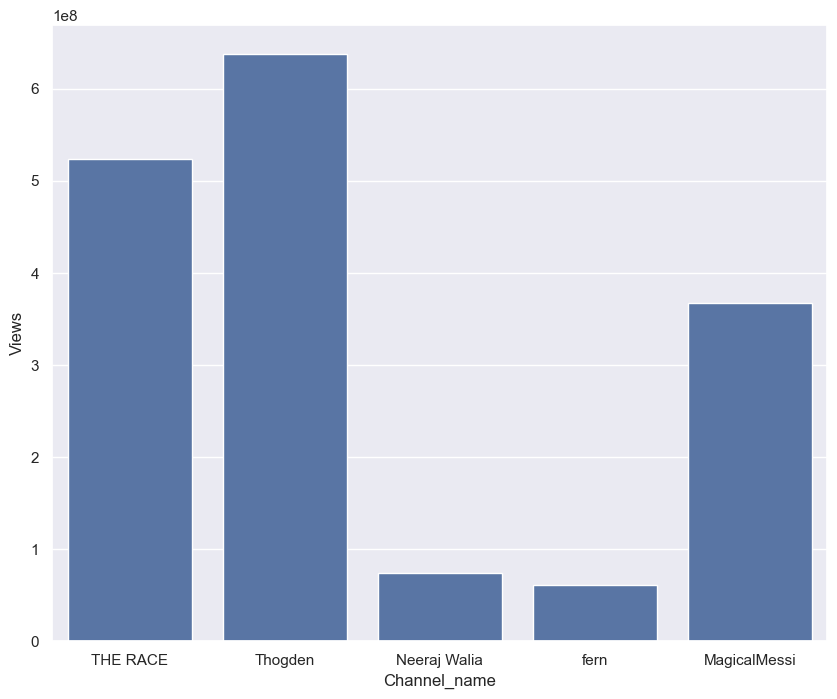

In [44]:
ax = sns.barplot(x='Channel_name',y='Views',data=channel_data)

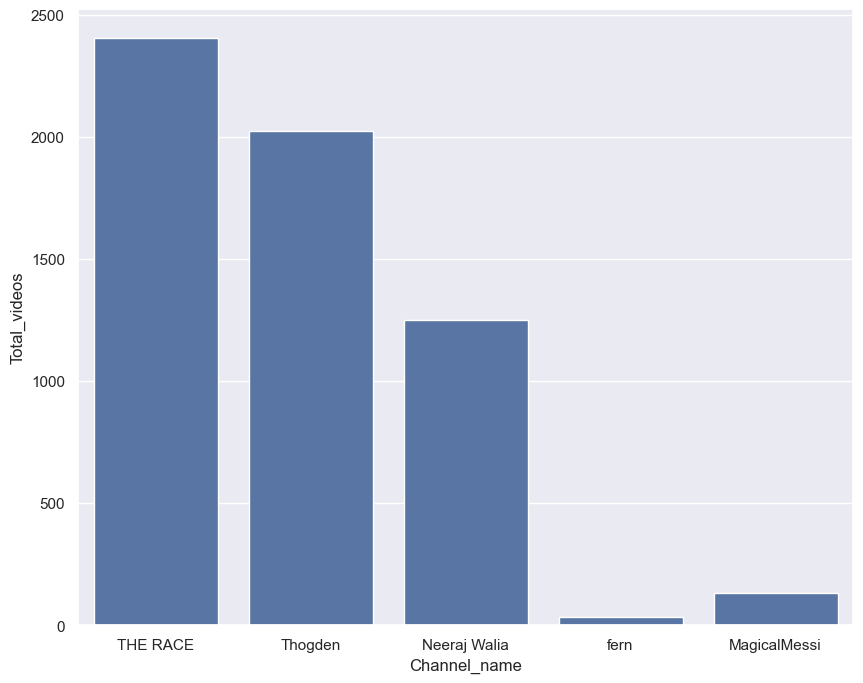

In [47]:
ax = sns.barplot(x='Channel_name',y='Total_videos',data=channel_data)

## Function to get video ids

In [127]:
playlist_id = channel_data.loc[channel_data['Channel_name'] == 'THE RACE','Playlist_id'].iloc[0]

In [128]:
playlist_id

'UUaTxfj0BzL-MaCy-YUqPRoQ'

In [129]:
def get_video_ids(youtube,playlist_id):

    request = youtube.playlistItems().list(
        part = 'contentDetails',
        playlistId = playlist_id,
        maxResults = 50
    )
    response = request.execute()
    video_ids = []

    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                part = 'contentDetails',
                playlistId = playlist_id,
                maxResults = 50,
                pageToken = next_page_token
                )
            response = request.execute()

            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])

            next_page_token = response.get('nextPageToken')
    return video_ids

In [130]:
video_ids = get_video_ids(youTube,playlist_id)

In [131]:
video_ids

['OHasdHB3hLU',
 's5MmMUKGYjg',
 'hcddjGuvCAg',
 'H6jYT6a1Tz4',
 '2VqJQEPaN8w',
 'V9vyzgx91IQ',
 'WnGS4mAI1f0',
 'Ylcky2O_VjM',
 'mo1inw5HVRY',
 'KMahCB5DWV4',
 'c9AjMKSLc-A',
 'plN5hF11cP4',
 'tnvIm6MGGWs',
 'ZlRtI9mUILM',
 'hTJrXxYtczs',
 'KHFdCHLGRPw',
 'E989MzMg-4A',
 'GxH0eewD8GI',
 'qChLTmfZ2BI',
 'LocyuJG8kdI',
 'RqzYYvCZw5M',
 '0KvWl8X85f8',
 'RyShn_435wM',
 '850ktnQE7G4',
 'x3B2wKzDJJc',
 'gaChXjTJowc',
 'ui_D6ahs_0w',
 'XfvURqIn2VE',
 'weDpVn-Er3A',
 'eFql8gShbQA',
 'F9rwjBHJ_Co',
 'zsmScPq5LEI',
 'i6gY51gN50k',
 'tgQ_48HbhOo',
 '_bZF1oDY4AI',
 'BhVXp1KvD3o',
 'uglFRnd5jyg',
 'vCgkJPeyU3w',
 'KAYlXyrCzqw',
 'cyhoePoNuuI',
 'y_O6EtWrTbM',
 'px9Yc979AEQ',
 '8JQfjOh3i8g',
 '8LdiYqUhgR8',
 'qPkmEeA22DY',
 'CBpUgNXHQFI',
 'foYBSAwNMDc',
 'PcVMijTIYOs',
 '9Lu_5uLDV24',
 'l--yix94eX4',
 'PHDT4KX45aA',
 '7oaj5Q3OPA8',
 '01VklRaIIzk',
 'q2bPI2PCyb4',
 'oIAiJwVDCKE',
 'UQ9KEcItF6Y',
 '2PW_qTLayuw',
 'kX16YROv7h4',
 'o-bansn1-Ag',
 '6QVVEH_-AGA',
 'T3ulcBoCHuc',
 'HZPj9iAWz-4',
 'H0Gxb6

## Function to get video details

In [132]:
def get_video_details(youtube,video_ids):
    all_video_stats = []
    for i in range(0,len(video_ids),50):
        request = youtube.videos().list(
            part="snippet,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute()

        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                                Published_date = video['snippet']['publishedAt'],
                                Views = video['statistics']['viewCount'],
                                #Likes = video['statistics']['likeCount'],
                                Comments = video['statistics']['commentCount']
                                )
            
            all_video_stats.append(video_stats)

    return all_video_stats

In [133]:
video_details = get_video_details(youTube,video_ids)

In [109]:
video_data = pd.DataFrame(video_details)

In [134]:
video_data

,Title,Published_date,Views,Comments
0,Fernando Alonso's dire warning for Aston Marti...,2024-06-26,167590,395
1,The Ferrari weaknesses being exposed in F1 2024,2024-06-25,191742,326
2,😬 TENSION growing between Ferrari F1 drivers,2024-06-24,59655,113
3,Briatore's controversial return exposes Renaul...,2024-06-24,216912,866
4,How McLaren threatened Red Bull in F1 2024's S...,2024-06-25,22762,54
...,...,...,...,...
2398,GT Academy UK Ep 12: Our 370Z is smashed at th...,2013-03-21,2196,2
2399,The importance of racing lines... GT Academy U...,2013-03-21,3335,2
2400,UK versus Europe in 370Z's: GT Academy UK Ep 10,2013-03-21,2797,1
2401,How to win the Dubai 24hr - Overtake 80 cars a...,2013-03-21,2037,2


In [135]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Comments'] = pd.to_numeric(video_data['Comments'])
video_data.dtypes

Title             object
Published_date    object
Views              int64
Comments           int64
dtype: object

In [136]:
video_data

,Title,Published_date,Views,Comments
0,Fernando Alonso's dire warning for Aston Marti...,2024-06-26,167590,395
1,The Ferrari weaknesses being exposed in F1 2024,2024-06-25,191742,326
2,😬 TENSION growing between Ferrari F1 drivers,2024-06-24,59655,113
3,Briatore's controversial return exposes Renaul...,2024-06-24,216912,866
4,How McLaren threatened Red Bull in F1 2024's S...,2024-06-25,22762,54
...,...,...,...,...
2398,GT Academy UK Ep 12: Our 370Z is smashed at th...,2013-03-21,2196,2
2399,The importance of racing lines... GT Academy U...,2013-03-21,3335,2
2400,UK versus Europe in 370Z's: GT Academy UK Ep 10,2013-03-21,2797,1
2401,How to win the Dubai 24hr - Overtake 80 cars a...,2013-03-21,2037,2


In [137]:
top10_videos = video_data.sort_values(by='Views',ascending=False).head(10)
top10_videos

,Title,Published_date,Views,Comments
2075,INCREDIBLE 360 DEGREE VIDEO! GT-R Drives First...,2015-06-12,5860300,726
2073,LE MANS PIT STOP POV!,2015-06-13,5020529,377
1360,12 crazy stunts Red Bull did with F1 cars,2020-05-11,4516066,1304
1446,Juan Correa On The Hubert Crash And His Battle...,2020-02-15,3572490,1420
1247,The 10 weirdest tracks F1 has raced on,2020-09-03,3187163,1875
586,🏁 When an F1 car ran at LE MANS,2023-01-15,2771371,1028
915,10 genius F1 innovations that were outlawed,2021-11-04,2719603,1627
265,❌ Why F1 doesn't check every F1 car is LEGAL,2023-10-26,2637077,557
1163,How Grosjean survived fireball Bahrain F1 cras...,2020-11-29,2509656,1861
299,🛠️ The UNUSUAL F1 rule Williams broke,2023-09-26,2398788,781


d:\anaconda\mini\envs\youtube\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) Arial.
  func(*args, **kwargs)
d:\anaconda\mini\envs\youtube\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  func(*args, **kwargs)
d:\anaconda\mini\envs\youtube\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128736 (\N{HAMMER AND WRENCH}) missing from font(s) Arial.
  func(*args, **kwargs)
d:\anaconda\mini\envs\youtube\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  func(*args, **kwargs)
d:\anaconda\mini\envs\youtube\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\mini\envs\youtube\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 1006

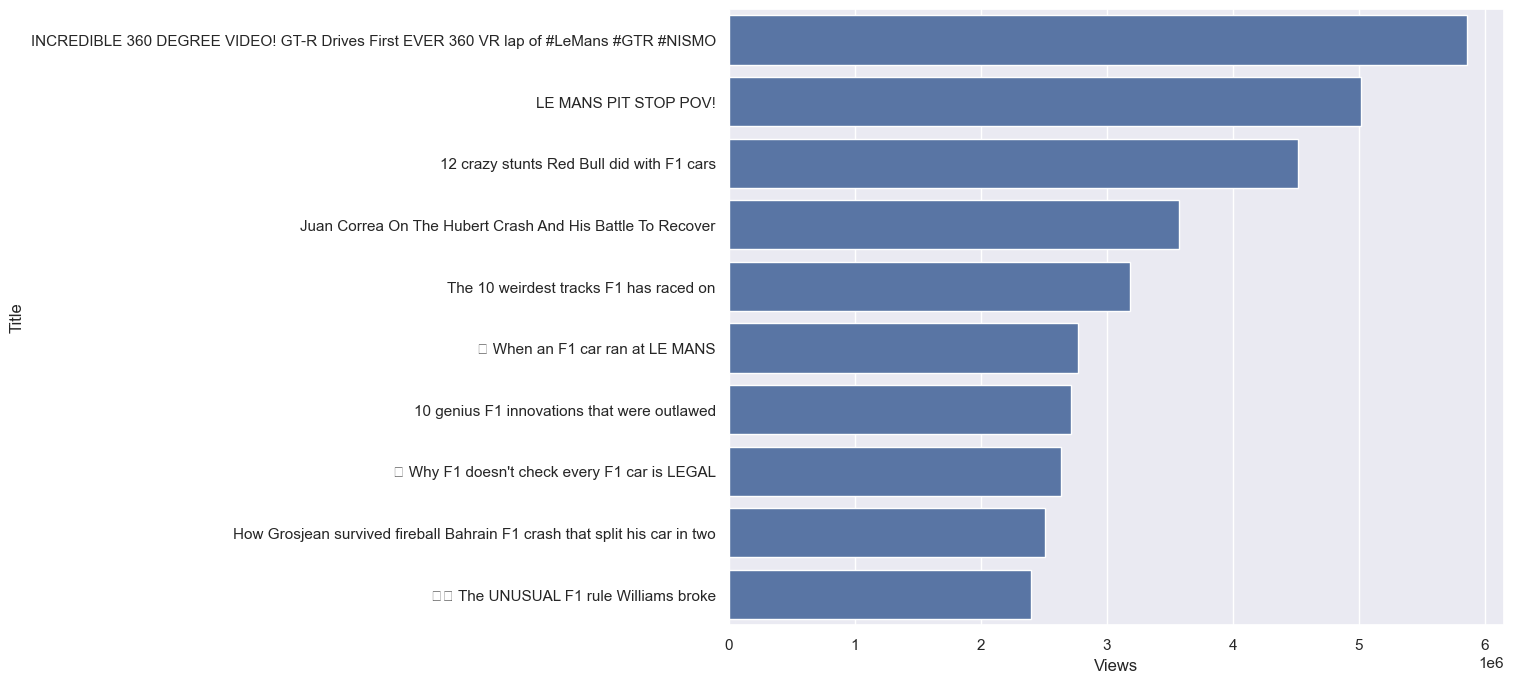

In [138]:
ax1 = sns.barplot(x = 'Views', y = 'Title',data=top10_videos)

In [139]:
video_data

,Title,Published_date,Views,Comments
0,Fernando Alonso's dire warning for Aston Marti...,2024-06-26,167590,395
1,The Ferrari weaknesses being exposed in F1 2024,2024-06-25,191742,326
2,😬 TENSION growing between Ferrari F1 drivers,2024-06-24,59655,113
3,Briatore's controversial return exposes Renaul...,2024-06-24,216912,866
4,How McLaren threatened Red Bull in F1 2024's S...,2024-06-25,22762,54
...,...,...,...,...
2398,GT Academy UK Ep 12: Our 370Z is smashed at th...,2013-03-21,2196,2
2399,The importance of racing lines... GT Academy U...,2013-03-21,3335,2
2400,UK versus Europe in 370Z's: GT Academy UK Ep 10,2013-03-21,2797,1
2401,How to win the Dubai 24hr - Overtake 80 cars a...,2013-03-21,2037,2


In [140]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [141]:
video_data

,Title,Published_date,Views,Comments,Month
0,Fernando Alonso's dire warning for Aston Marti...,2024-06-26,167590,395,Jun
1,The Ferrari weaknesses being exposed in F1 2024,2024-06-25,191742,326,Jun
2,😬 TENSION growing between Ferrari F1 drivers,2024-06-24,59655,113,Jun
3,Briatore's controversial return exposes Renaul...,2024-06-24,216912,866,Jun
4,How McLaren threatened Red Bull in F1 2024's S...,2024-06-25,22762,54,Jun
...,...,...,...,...,...
2398,GT Academy UK Ep 12: Our 370Z is smashed at th...,2013-03-21,2196,2,Mar
2399,The importance of racing lines... GT Academy U...,2013-03-21,3335,2,Mar
2400,UK versus Europe in 370Z's: GT Academy UK Ep 10,2013-03-21,2797,1,Mar
2401,How to win the Dubai 24hr - Overtake 80 cars a...,2013-03-21,2037,2,Mar


In [144]:
videos_per_month = video_data.groupby('Month',as_index=False).size()

In [145]:
videos_per_month

,Month,size
0,Apr,240
1,Aug,178
2,Dec,141
3,Feb,227
4,Jan,153
5,Jul,215
6,Jun,239
7,Mar,204
8,May,240
9,Nov,166


In [146]:
sort_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [147]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'],categories=sort_order ,ordered=True)

In [149]:
videos_per_month = videos_per_month.sort_index()

In [150]:
videos_per_month

,Month,size
Month,,
Jan,Jan,153
Feb,Feb,227
Mar,Mar,204
Apr,Apr,240
May,May,240
Jun,Jun,239
Jul,Jul,215
Aug,Aug,178
Sep,Sep,207


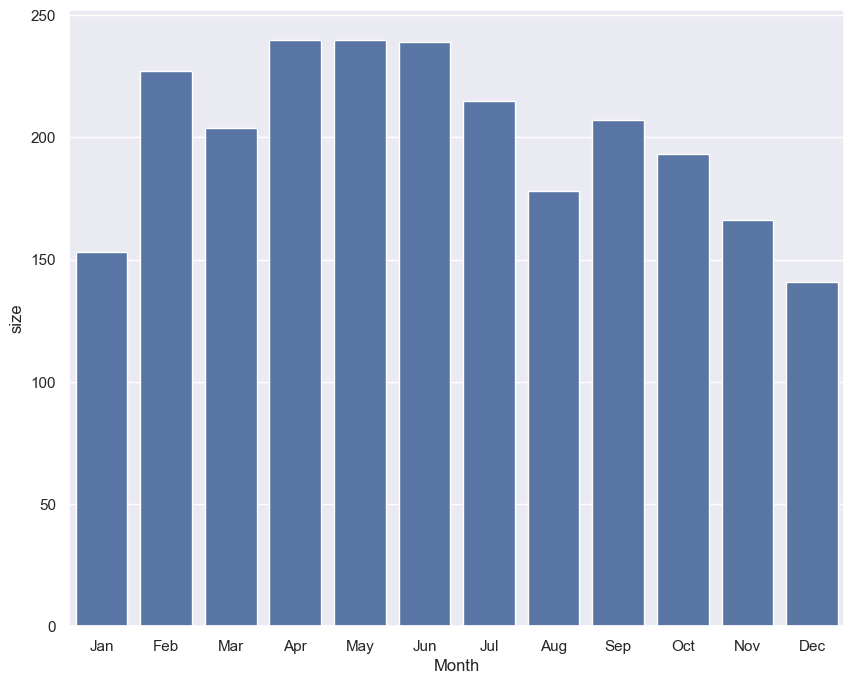

In [151]:
ax2 = sns.barplot(x = 'Month', y = 'size',data=videos_per_month)

In [152]:
videos_per_month.to_csv('Video_Deatils(THE RACE).csv')